## Download NLTK modules

In [1]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/fernankiwi/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fernankiwi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fernankiwi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import NTLK Corpus

In [2]:
from nltk.corpus import  movie_reviews

In [7]:
print(movie_reviews.words())
print(len(movie_reviews.words()))

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
1583820


In [4]:
 movie_reviews.sents()

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]

In [5]:
print('\n'.join(' '.join(sent) for sent in movie_reviews.sents()[:5]))

plot : two teen couples go to a church party , drink and then drive .
they get into an accident .
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .
what ' s the deal ?
watch the movie and " sorta " find out .


## Word frequency

In [6]:
from nltk import FreqDist
f = FreqDist(movie_reviews.words())
f.most_common(20)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595),
 (')', 11781),
 ('(', 11664),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961)]

In [9]:
f = FreqDist(w for w in movie_reviews.words() if any(c.isalpha() for c in w))
f.most_common(20)

[('the', 76529),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('it', 16107),
 ('that', 15924),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961),
 ('his', 9587),
 ('this', 9578),
 ('film', 9517),
 ('i', 8889),
 ('he', 8864),
 ('but', 8634),
 ('on', 7385)]

## Using labeled corpus and frequency problems

In [ ]:
movie_reviews.categories()

['neg', 'pos']

In [11]:
positives = FreqDist(movie_reviews.words(categories='pos'))
negatives = FreqDist(movie_reviews.words(categories='neg'))

In [12]:
 negatives.most_common(20)

[(',', 35269),
 ('the', 35058),
 ('.', 32162),
 ('a', 17910),
 ('and', 15680),
 ('of', 15487),
 ('to', 15420),
 ("'", 15317),
 ('is', 11136),
 ('in', 10097),
 ('"', 9120),
 ('s', 8854),
 ('that', 7803),
 ('it', 7756),
 ('-', 7664),
 (')', 5742),
 ('(', 5650),
 ('with', 4941),
 ('this', 4930),
 ('as', 4900)]

In [13]:
positives.most_common(20)

[(',', 42448),
 ('the', 41471),
 ('.', 33714),
 ('a', 20196),
 ('and', 19896),
 ('of', 18636),
 ('to', 16517),
 ("'", 15268),
 ('is', 14059),
 ('in', 11725),
 ('s', 9659),
 ('"', 8492),
 ('it', 8351),
 ('that', 8121),
 ('-', 7931),
 ('as', 6478),
 (')', 6039),
 ('(', 6014),
 ('with', 5851),
 ('his', 5588)]

In [14]:
real_negatives = negatives - positives
real_negatives.most_common(20)

[('movie', 721),
 ('t', 700),
 ('i', 685),
 ('bad', 673),
 ('?', 631),
 ('"', 628),
 ('have', 421),
 ('!', 399),
 ('no', 350),
 ('plot', 321),
 ('there', 318),
 ('if', 301),
 ('*', 286),
 ('this', 282),
 ('so', 267),
 ('why', 250),
 ('just', 221),
 ('only', 219),
 ('worst', 210),
 ('even', 207)]

## Tokenizers


In [24]:
from nltk.tokenize import word_tokenize
word_tokenize("Daniels made several appearances as C-3PO on numerous TV shows and commercials, notably on a Star Wars-themed episode  of The Donny and Marie Show in 1977, Disneyland's 35th Anniversary.")

['Daniels',
 'made',
 'several',
 'appearances',
 'as',
 'C-3PO',
 'on',
 'numerous',
 'TV',
 'shows',
 'and',
 'commercials',
 ',',
 'notably',
 'on',
 'a',
 'Star',
 'Wars-themed',
 'episode',
 'of',
 'The',
 'Donny',
 'and',
 'Marie',
 'Show',
 'in',
 '1977',
 ',',
 'Disneyland',
 "'s",
 '35th',
 'Anniversary',
 '.']

In [28]:
from nltk.tokenize import SyllableTokenizer
SSP = SyllableTokenizer()
print(SSP.tokenize("Daniels made "))
print(SSP.tokenize("Alejandro"))

['Da', 'niel', 's ', 'ma', 'de ']
['Ale', 'jan', 'dro']


/Users/fernankiwi/.pyenv/versions/3.11.0/lib/python3.11/site-packages/nltk/tokenize/sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ' '
  warnings.warn(


## DIY Corpus

In [ ]:
from nltk.corpus import PlaintextCorpusReader

corpus_root = "drive/MyDrive/Colab Notebooks/archive/Star Wars"
my_corpus = PlaintextCorpusReader(corpus_root,".*")

In [ ]:
my_corpus.fileids()

['SW_EpisodeIV.txt', 'SW_EpisodeV.txt', 'SW_EpisodeVI.txt']

In [ ]:
my_corpus.words()

['"', 'character', '"', '"', 'dialogue', '"', '"', '1', ...]

In [ ]:
my_corpus.sents()

[['"', 'character', '"', '"', 'dialogue', '"', '"', '1', '"', '"', 'THREEPIO', '"', '"', 'Did', 'you', 'hear', 'that', '?'], ['They', "'", 've', 'shut', 'down', 'the', 'main', 'reactor', '.'], ...]

In [ ]:
len(my_corpus.words())

53294

In [31]:
import numpy as np
import pandas as pd

def get_frequency_corpus(my_corpus):
  frequent_words = {}
  for word in my_corpus.words():
    if word in frequent_words:
      frequent_words[word]+=1
    else:
      frequent_words[word]=1
  keys = list(frequent_words.keys())
  values = list(frequent_words.values())
  sorted_value_index = np.flip(np.argsort(values))
  sorted_dict = [(keys[i], values[i]) for i in sorted_value_index]
  return sorted_dict

In [ ]:
frequency = get_frequency_corpus(my_corpus)
frequency[:100]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(frequency, columns =['token', 'count'])
df["position"]= df.apply((lambda x: x.name), axis=1)
df.plot.scatter(x='position',y='count')

In [ ]:
df["zipf"]= df.apply((lambda x: x.name * x["count"]), axis=1)

<Axes: xlabel='position', ylabel='zipf'>

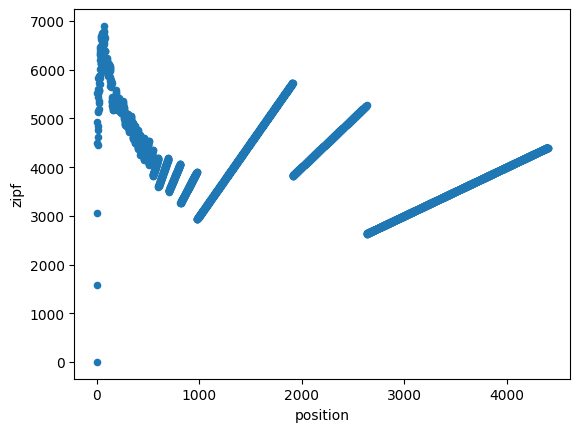

In [ ]:
df.plot.scatter(x='position',y='zipf')

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(frequency_list):
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [(token, count) for token,count in frequency_list if token.lower() not in stop_words]
    return filtered_tokens
new_frequency = remove_stopwords(frequency)
new_frequency[:20]

[('"', 12638),
 ('."', 1573),
 ("'", 1533),
 (',', 1500),
 ('.', 1383),
 ('LUKE', 495),
 ('HAN', 461),
 ('!"', 430),
 ('!', 393),
 ('?"', 365),
 ('THREEPIO', 302),
 ('LEIA', 227),
 ('...', 215),
 ('-', 175),
 ('?', 158),
 ('VADER', 140),
 ('Luke', 137),
 ('going', 118),
 ('BEN', 115),
 ('..."', 106)]

In [ ]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def clean_alphanumeric(frequency_list):
   return  [(token, count) for token,count in frequency_list if token.isalnum()]
new_frequency = clean_alphanumeric(new_frequency)
new_frequency[:20]

[('LUKE', 495),
 ('HAN', 461),
 ('THREEPIO', 302),
 ('LEIA', 227),
 ('VADER', 140),
 ('Luke', 137),
 ('going', 118),
 ('BEN', 115),
 ('know', 105),
 ('Oh', 104),
 ('right', 102),
 ('LANDO', 101),
 ('get', 100),
 ('Artoo', 85),
 ('us', 83),
 ('see', 78),
 ('got', 74),
 ('back', 72),
 ('one', 72),
 ('Well', 71)]

<Axes: xlabel='position', ylabel='count'>

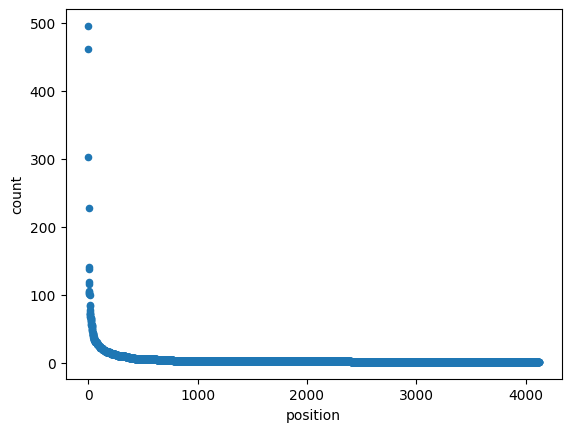

In [ ]:
df = pd.DataFrame(new_frequency, columns =['token', 'count'])
df["position"]= df.apply((lambda x: x.name), axis=1)
df.plot.scatter(x='position',y='count')

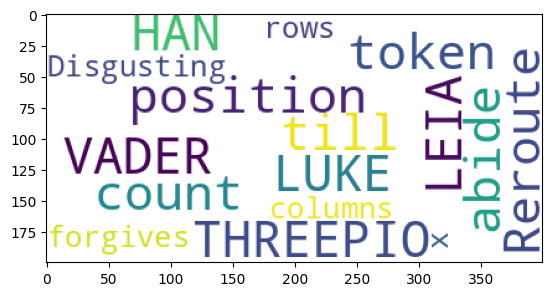

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as mplot

oc_cloud= WordCloud(background_color='white', max_words=300,
                    max_font_size=40,random_state=1).generate(str(df))
mplot.imshow(oc_cloud)

In [ ]:
analyzer = nltk.Text(my_corpus.words())
analyzer.concordance("vader")

Displaying 25 of 195 matches:
not in the main computer ." " 12 " " VADER " " Where are those transmissions yo
 on a diplomatic mission ." " 14 " " VADER " " If this is a consular ship ... w
 where is the Ambassador ?" " 15 " " VADER " " Commander , tear this ship apart
 She ' ll be all right . Inform Lord Vader we have a prisoner ." " 18 " " THREE
 nothing ..." " 42 " " LEIA " " Lord Vader , I should have known . Only you cou
 attacked a diplomatic ..." " 43 " " VADER " " Don ' t play games with me , You
ic mission to Alderaan ..." " 45 " " VADER " " You ' re a part of the Rebel All
 Rebellion in the senate ." " 47 " " VADER " " I have traced the Rebel spies to
MMANDER " " you anything ." " 49 " " VADER " " Leave that to me . Send a distre
 !" " 50 " " SECOND OFFICER " " Lord Vader , the battle station plans are not a
o life forms were aboard ." " 51 " " VADER " " She must have hidden the plans i
" " BEN " " A young Jedi named Darth Vader , who was a pupil of mine until he t
. Now the 

In [ ]:
analyzer.collocations()

RED LEADER; Lord Vader; dark side; INTERCOM VOICE; Death Star; Master
Luke; Sand People; battle station; GOLD LEADER; Wan Kenobi; Captain
Solo; DEATH STAR; Rebel base; bounty hunter; Gold Leader; tractor
beam; Millennium Falcon; Princess Leia; Uncle Owen; AUNT BERU
